<a href="https://colab.research.google.com/github/tejagandham18/Dataanalyst/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: generate a code to convert the json file to csv

import pandas as pd
import json

# 1. Load and validate JSON data:
try:
    with open("/content/Dataset_1.json", 'r') as f:
        json_data = json.load(f)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    # Inspect the JSON file for syntax errors or unexpected characters.

# 2. If the JSON is valid but not in a standard format:
# try specifying the 'orient' parameter in pd.read_json()
# e.g., orient='records', orient='index', orient='columns', or orient='values'.
try:
    data = pd.read_json("/content/Dataset_1.json", orient='records', lines=True) #added lines = True as json has multiple objects
except ValueError as e:
    print(f"ValueError: {e}")
    # If the error persists, further investigation is needed.

# 3. Convert to CSV:
try:
    data.to_csv("/content/output.csv", index=False)  # Save to CSV, without the DataFrame index
    print("Successfully converted JSON to CSV.")
except Exception as e:
    print(f"An error occurred during CSV conversion: {e}")


Error decoding JSON: Extra data: line 2 column 1 (char 4947)
Successfully converted JSON to CSV.


In [ ]:
data

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,NaN,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,...,[\nVettura visionabile nella sede in Via Roma ...,NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,"9,900 km",01/2019,1 previous owner,NaN,...,"[\nDach: Panorama-Glas-Schiebedach, Lackierung...",NaN,[\n7\n],[\nGermany\n],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15 km,03/2019,1 previous owner,NaN,...,"[\n, Getriebe:, Automatik, Technik:, Bordcom...",NaN,[\n6\n],[\nAustria\n],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10 km,06/2019,None,NaN,...,"[\nDEK:[2691331], Renault Espace Blue dCi 200C...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Identify and remove null or missing values.**

In [ ]:
# prompt: generate a code to Identify and remove null or missing values.

# Identify and remove null or missing values.
import pandas as pd
import json

# ... (your existing code to load the JSON data into the 'data' DataFrame) ...

# Check for missing values
print(data.isnull().sum())

# Remove rows with any missing values
data_cleaned = data.dropna()

# Alternatively, remove rows where all values are missing
# data_cleaned = data.dropna(how='all')


# Alternatively, remove columns with any missing values
# data_cleaned = data.dropna(axis=1)

# Alternatively, fill missing values with a specific value (e.g., 0)
# data_cleaned = data.fillna(0)


# Alternatively, fill missing values with the mean of the column:
# data_cleaned = data.fillna(data.mean())

# Display the cleaned data
print("\nData after removing null values:")
data_cleaned


# Further analysis or processing with the cleaned data
# ...


url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from


# **Standardize numerical fields (e.g., price, km) for consistency.**

In [ ]:
# prompt: generate a code to covert Standardize numerical fields (e.g., price, km) for consistency.

import pandas as pd
import json
from sklearn.preprocessing import StandardScaler

# Load the data (assuming the previous code has successfully loaded the data into 'data')
try:
    data = pd.read_json("/content/Dataset_1.json", orient='records', lines=True)
except ValueError as e:
    print(f"ValueError: {e}")


# Identify numerical columns for standardization
numerical_cols = data.select_dtypes(include=['number']).columns

# Check if there are any numerical columns
if not numerical_cols.empty:
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit and transform the numerical columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("Data after standardization:")
    print(data)
else:
    print("No numerical columns found in the DataFrame.")

# The rest of your code to handle missing values, etc.
# ... (your existing code to handle missing values) ...


Data after standardization:
                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description bo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# **Convert string fields like registration into proper datetime objects.**

In [ ]:
# prompt: generate a code to Convert string fields like registration into proper datetime objects.

# ... (your existing code) ...

# **Convert string fields like registration into proper datetime objects.**

# Assuming 'registration' is the column name containing date strings
try:
    # Attempt to convert the 'registration' column to datetime objects
    data['registration'] = pd.to_datetime(data['registration'], errors='coerce')

    # Handle invalid dates (if any)
    invalid_dates_mask = data['registration'].isnull()
    if invalid_dates_mask.any():
        print("Warning: Invalid date values encountered. Filling with NaT.")
        # Option 1: Fill with NaT (Not a Time)
        #data.loc[invalid_dates_mask, 'registration'] = pd.NaT

        # Option 2: Remove rows with invalid dates
        data = data[~invalid_dates_mask]

    print("Data after converting 'registration' to datetime:")
    print(data)

except KeyError:
    print("Error: 'registration' column not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred during datetime conversion: {e}")

# ... (rest of your code) ...


Data after converting 'registration' to datetime:
                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15913  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                     

<ipython-input-17-9bdc6017a16d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration'] = pd.to_datetime(data['registration'], errors='coerce')


# **Calculate mean, median, and standard deviation for price and km.**

In [ ]:
# prompt: generate a code to Calculate mean, median, and standard deviation for price and km.

# Calculate mean, median, and standard deviation for price and km.
if 'price' in data_cleaned.columns and 'km' in data_cleaned.columns:
    print("\nStatistics for price and km:")
    print("Price:")
    print("Mean:", data_cleaned['price'].mean())
    print("Median:", data_cleaned['price'].median())
    print("Standard Deviation:", data_cleaned['price'].std())

    print("\nkm:")
    print("Mean:", data_cleaned['km'].mean())
    print("Median:", data_cleaned['km'].median())
    print("Standard Deviation:", data_cleaned['km'].std())
else:
    print("Error: 'price' or 'km' columns not found in the DataFrame.")



Statistics for price and km:
Price:
Mean: nan
Median: nan
Standard Deviation: nan

km:
Mean: nan
Median: nan
Standard Deviation: nan


# **Count the frequency of each make_model.**

In [9]:
# prompt: generate a code for to count the frequency of each make model

# Count the frequency of each make_model.
if 'make_model' in data.columns:
    make_model_counts = data['make_model'].value_counts()
    print("\nFrequency of each make_model:")
    print(make_model_counts)
else:
    print("Error: 'make_model' column not found in the DataFrame.")



Frequency of each make_model:
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64


# Plot the distribution of price and km.

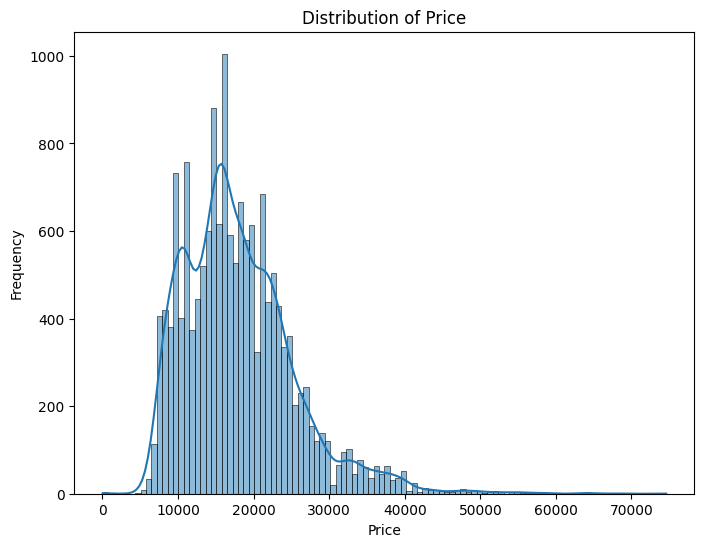

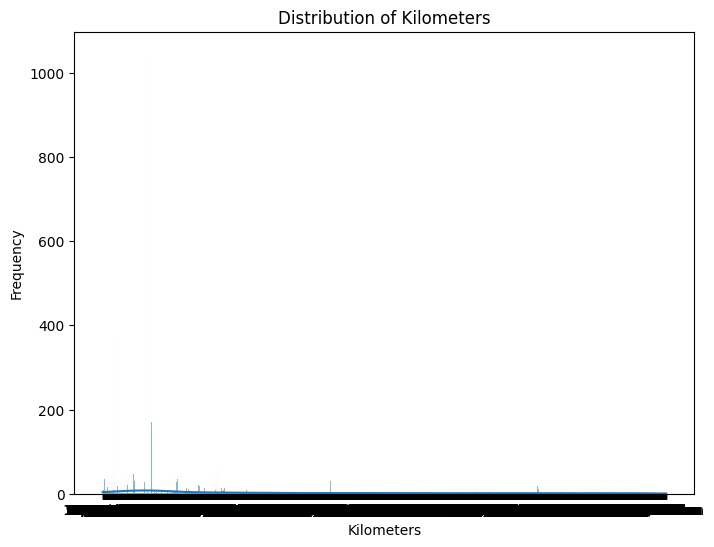

In [19]:
# prompt: generate a code to plot the distribution pf price and km for above data set.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of km
plt.figure(figsize=(8, 6))
sns.histplot(data['km'], kde=True)
plt.title('Distribution of Kilometers')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()


# 	Analyze the average price by body_type.


Average price by body_type:
body_type
Compact          15216.240089
Convertible      27905.375000
Coupe            14222.720000
Off-Road         17126.160714
Other            14209.796552
Sedans           17735.904846
Station wagon    18643.281171
Transporter      16764.795455
Van              30846.632184
Name: price, dtype: float64


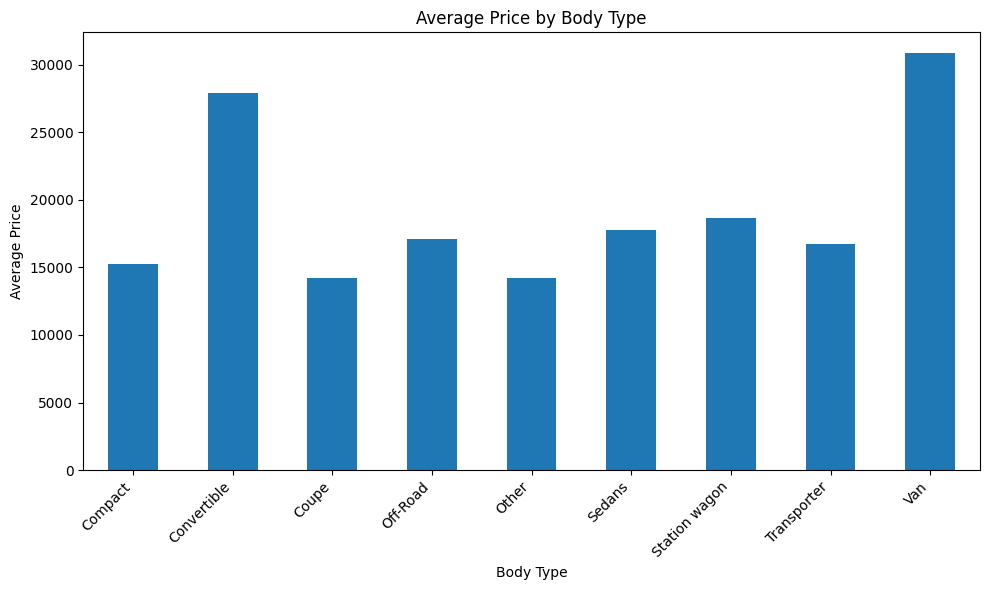

In [20]:
# prompt: generate a code for to Analyze the average price by body_type.

# Analyze the average price by body_type.
if 'body_type' in data.columns and 'price' in data.columns:
    average_price_by_body_type = data.groupby('body_type')['price'].mean()
    print("\nAverage price by body_type:")
    print(average_price_by_body_type)

    # Create a bar plot to visualize the average price by body type
    plt.figure(figsize=(10, 6))
    average_price_by_body_type.plot(kind='bar')
    plt.title('Average Price by Body Type')
    plt.xlabel('Body Type')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Error: 'body_type' or 'price' columns not found in the DataFrame.")


# Identify correlations between numerical variables, such as price and km.


Correlation between price and km: -0.3878211904400773


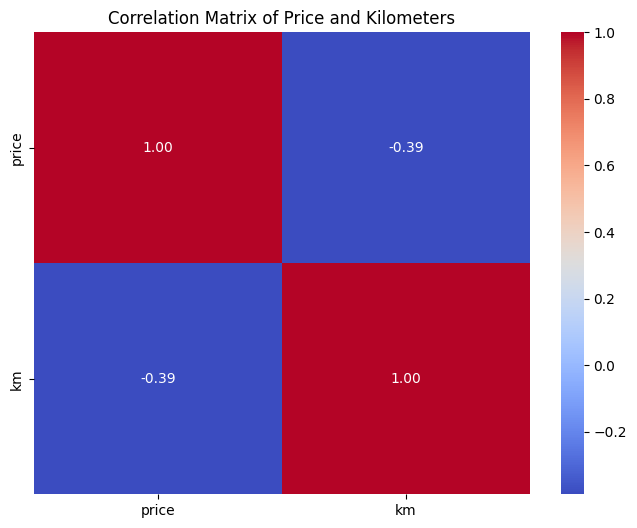

In [22]:
# Identify correlations between numerical variables, such as price and km.
if 'price' in data.columns and 'km' in data.columns:
    # Convert 'km' column to numeric, removing commas and 'km'
    data['km'] = pd.to_numeric(data['km'].str.replace(',', '').str.replace(' km', ''), errors='coerce')

    correlation = data['price'].corr(data['km'])
    print(f"\nCorrelation between price and km: {correlation}")

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[['price', 'km']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Price and Kilometers')
    plt.show()
else:
    print("Error: 'price' or 'km' columns not found in the DataFrame.")

# Create a scatter plot to show the relationship between price and km.

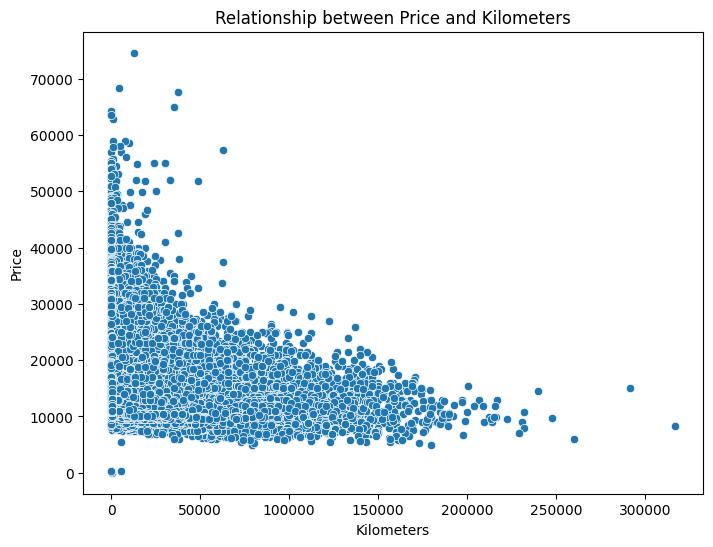

In [23]:
# prompt: generate a code for to Create a scatter plot to show the relationship between price and km.

# Create a scatter plot to show the relationship between price and km.
if 'price' in data.columns and 'km' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='km', y='price', data=data)
    plt.title('Relationship between Price and Kilometers')
    plt.xlabel('Kilometers')
    plt.ylabel('Price')
    plt.show()
else:
    print("Error: 'price' or 'km' columns not found in the DataFrame.")


# Use a bar chart to compare the average price of different body_type.


Average price by body_type:
body_type
Compact          15216.240089
Convertible      27905.375000
Coupe            14222.720000
Off-Road         17126.160714
Other            14209.796552
Sedans           17735.904846
Station wagon    18643.281171
Transporter      16764.795455
Van              30846.632184
Name: price, dtype: float64


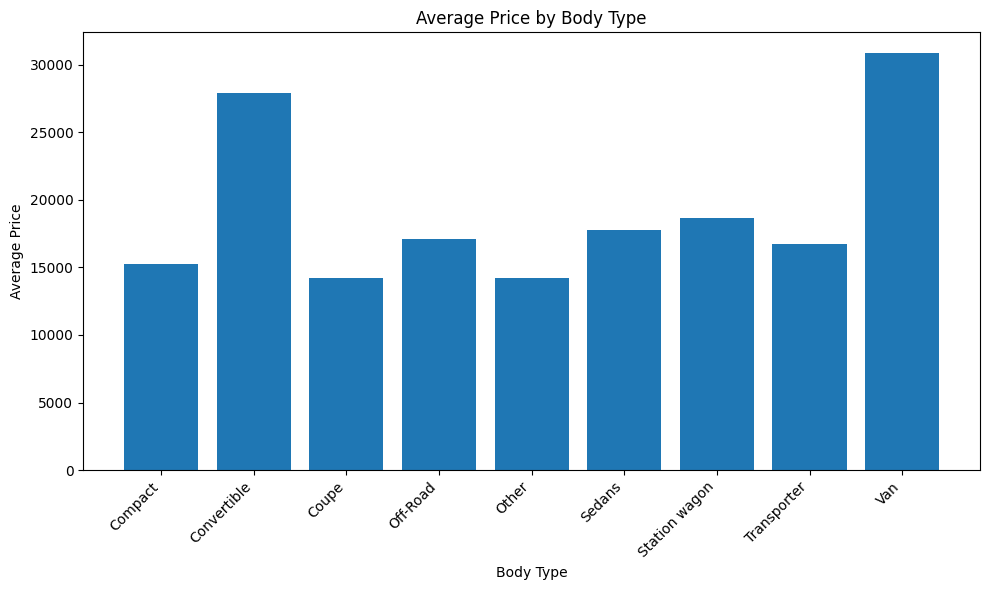

In [24]:
# prompt: generate a code for to Use a bar chart to compare the average price of different body_type.

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# # Use a bar chart to compare the average price of different body_type.
if 'body_type' in data.columns and 'price' in data.columns:
    average_price_by_body_type = data.groupby('body_type')['price'].mean()
    print("\nAverage price by body_type:")
    print(average_price_by_body_type)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(average_price_by_body_type.index, average_price_by_body_type.values)
    plt.title('Average Price by Body Type')
    plt.xlabel('Body Type')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("Error: 'body_type' or 'price' columns not found in the DataFrame.")


# Display a pie chart for the proportion of different make_model.

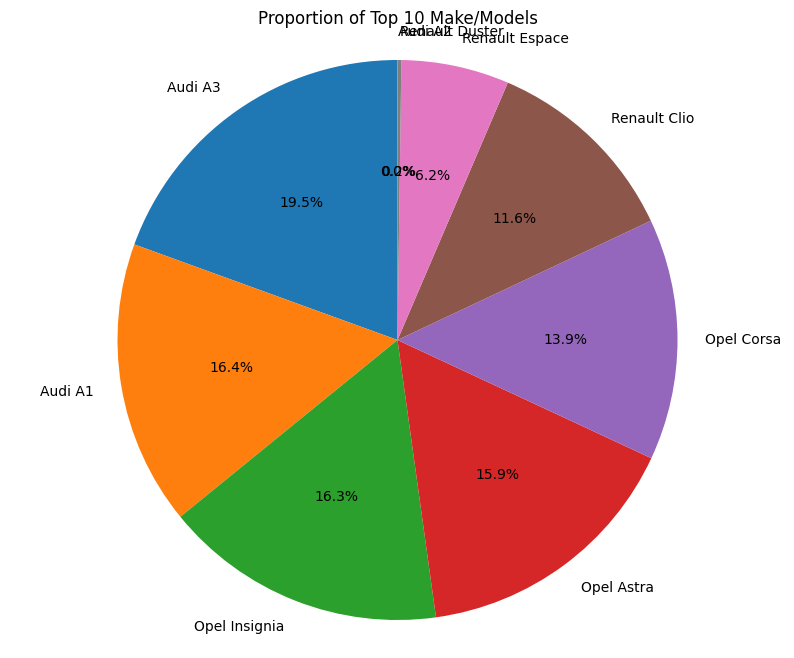

In [25]:
# prompt: generate a code for to Display a pie chart for the proportion of different make_model.

# Display a pie chart for the proportion of different make_model.
if 'make_model' in data.columns:
    make_model_counts = data['make_model'].value_counts()

    # Select top N make_models for the pie chart (e.g., top 10)
    N = 10  # Adjust N as needed
    top_make_models = make_model_counts.head(N)

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(top_make_models, labels=top_make_models.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Top {N} Make/Models')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Error: 'make_model' column not found in the DataFrame.")


# Create a new column for the age of the car using the registration field.

In [28]:
import pandas as pd

# Assuming 'data' DataFrame is already loaded
if 'registration' in data.columns:
    # Convert 'registration' column to datetime if it's not already
    data['registration'] = pd.to_datetime(data['registration'], errors='coerce')

    current_year = pd.Timestamp.now().year  # Get the current year
    data['car_age'] = current_year - data['registration'].dt.year

    print("Data with 'car_age' column:")
    print(data)
else:
    print("Error: 'registration' column not found in the DataFrame.")

Data with 'car_age' column:
                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description bo

<ipython-input-28-4d6a237df423>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration'] = pd.to_datetime(data['registration'], errors='coerce')


# Generate a price_per_km column to assess cost efficiency.

In [30]:
# prompt: Generate a price_per_km column to assess cost efficiency.

# Generate a price_per_km column to assess cost efficiency.
if 'price' in data.columns and 'km' in data.columns:
    # Check if 'km' is already numeric, if not convert
    if not pd.api.types.is_numeric_dtype(data['km']):
        data['km'] = pd.to_numeric(data['km'].str.replace(',', '').str.replace(' km', ''), errors='coerce')

    # Calculate price_per_km, handling potential division by zero
    data['price_per_km'] = data['price'] / data['km'].replace(0, 1)  # Replace 0 km with 1 to avoid division by zero

    print("Data with 'price_per_km' column:")
    print(data)
else:
    print("Error: 'price' or 'km' columns not found in the DataFrame.")

Data with 'price_per_km' column:
                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_descripti

# Create categories for cars based on price (e.g., low, mid, high).

In [39]:
# prompt: generate a code for to Create categories for cars based on price (e.g., low, mid, high).

# Define price thresholds for categories
low_threshold = data['price'].quantile(0.33)  # 33rd percentile
high_threshold = data['price'].quantile(0.66)  # 66th percentile

# Create the 'price_category' column based on the price thresholds
data['price_category'] = pd.cut(data['price'], bins=[-float('inf'), low_threshold, high_threshold, float('inf')], labels=['low', 'mid', 'high'])

print("Data with 'price_category' column:")
data


Data with 'price_category' column:


,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,car_age,price_per_km,price_category,price_group,km_group,age_group
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,2 previous owners,NaN,...,NaN,NaN,NaN,NaN,9.0,0.281542,mid,Medium,Medium,Medium
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,None,NaN,...,NaN,NaN,NaN,NaN,8.0,0.181250,mid,Medium,Medium,Medium
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,1 previous owner,NaN,...,NaN,NaN,NaN,NaN,9.0,0.175434,mid,Medium,Medium,Medium
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,2016-08-01,1 previous owner,NaN,...,NaN,NaN,NaN,NaN,9.0,0.198630,mid,Medium,Medium,Medium
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,2016-05-01,1 previous owner,NaN,...,NaN,NaN,NaN,NaN,9.0,1.036420,mid,Medium,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,NaN,NaT,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,high,Very High,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,9900.0,2019-01-01,1 previous owner,NaN,...,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN,6.0,4.028788,high,Very High,Low,Medium
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15.0,2019-03-01,1 previous owner,NaN,...,NaN,\nin 120 days from ordering\n,NaN,NaN,6.0,2658.333333,high,Very High,Low,Medium
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10.0,2019-06-01,None,NaN,...,NaN,NaN,NaN,NaN,6.0,3970.000000,high,Very High,Low,Medium


# Identify vehicles with specific features such as “VAT deductible”.

In [32]:
# prompt: generate a code for to Identify vehicles with specific features such as “VAT deductible”.

# Identify vehicles with specific features such as “VAT deductible”.
if 'vat' in data.columns:
    vat_deductible_vehicles = data[data['vat'] == 'VAT deductible']
    print("\nVehicles with VAT deductible:")
    print(vat_deductible_vehicles)
else:
    print("Error: 'vat' column not found in the DataFrame.")



Vehicles with VAT deductible:
                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
6      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
7      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
10     https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description

# Identify the most common car models in the dataset.

In [33]:
# prompt: generate a code for to Identify the most common car models in the dataset.

# Identify the most common car models in the dataset.
if 'make_model' in data.columns:
    most_common_models = data['make_model'].value_counts().nlargest(10)  # Get the top 10 most frequent models
    print("\nMost common car models:")
    print(most_common_models)
else:
    print("Error: 'make_model' column not found in the DataFrame.")



Most common car models:
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64


# Highlight the cars that provide the best value for money (low price_per_km).


Top 10 cars with the best value for money (lowest price_per_km):
                                                     url    make_model  \
5712   https://www.autoscout24.com//offers/opel-astra...    Opel Astra   
9279   https://www.autoscout24.com//offers/opel-corsa...    Opel Corsa   
8827   https://www.autoscout24.com//offers/opel-corsa...    Opel Corsa   
6399   https://www.autoscout24.com//offers/opel-astra...    Opel Astra   
8824   https://www.autoscout24.com//offers/opel-corsa...    Opel Corsa   
6401   https://www.autoscout24.com//offers/opel-astra...    Opel Astra   
6380   https://www.autoscout24.com//offers/opel-astra...    Opel Astra   
8822   https://www.autoscout24.com//offers/opel-corsa...    Opel Corsa   
13757  https://www.autoscout24.com//offers/renault-cl...  Renault Clio   
13761  https://www.autoscout24.com//offers/renault-cl...  Renault Clio   

                                       short_description      body_type  \
5712       Edition K Sports Tourer Automatik

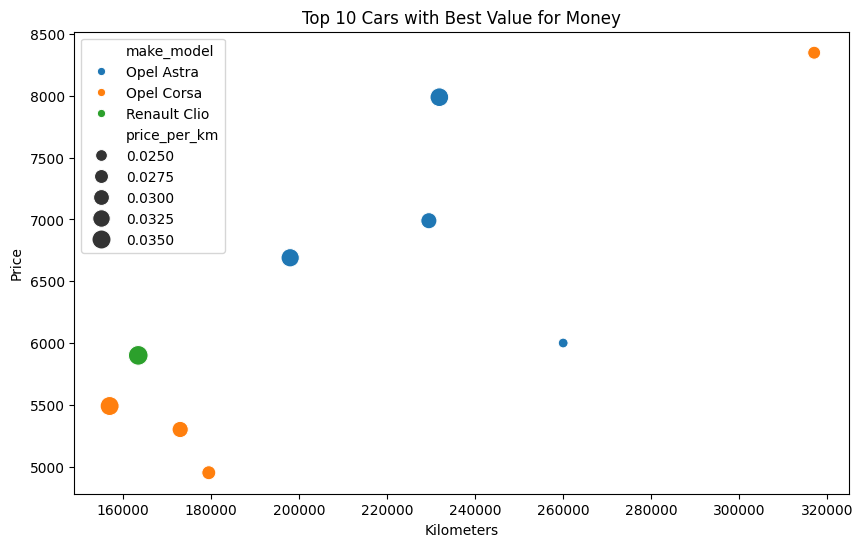

In [34]:
# prompt: generate a code for to Highlight the cars that provide the best value for money (low price_per_km).

# Assuming 'data' DataFrame is already loaded and 'price_per_km' column exists

# Sort the DataFrame by 'price_per_km' in ascending order
best_value_cars = data.sort_values('price_per_km', ascending=True)

# Display the top N cars with the lowest price_per_km
N = 10  # Number of top cars to display
print(f"\nTop {N} cars with the best value for money (lowest price_per_km):")
print(best_value_cars.head(N))

# Alternatively, you can highlight these cars in a plot:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=best_value_cars.head(N), hue='make_model', size='price_per_km', sizes=(50, 200))
plt.title(f'Top {N} Cars with Best Value for Money')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()


# Find the average price and mileage for VAT-deductible vehicles.

In [35]:
# prompt: generate a code for to Find the average price and mileage for VAT-deductible vehicles.

# Find the average price and mileage for VAT-deductible vehicles.
if 'vat' in data.columns and 'price' in data.columns and 'km' in data.columns:
    vat_deductible_vehicles = data[data['vat'] == 'VAT deductible']

    if not vat_deductible_vehicles.empty:  # Check if there are any VAT-deductible vehicles
        avg_price = vat_deductible_vehicles['price'].mean()
        avg_mileage = vat_deductible_vehicles['km'].mean()

        print("\nAverage price and mileage for VAT-deductible vehicles:")
        print("Average Price:", avg_price)
        print("Average Mileage:", avg_mileage)
    else:
        print("\nNo VAT-deductible vehicles found in the dataset.")
else:
    print("Error: 'vat', 'price', or 'km' columns not found in the DataFrame.")



Average price and mileage for VAT-deductible vehicles:
Average Price: 18708.520127504555
Average Mileage: 31506.39280109847


# Group the vehicles based on attributes like price, km, and age.


In [36]:
# prompt: generate a code for Group the vehicles based on attributes like price, km, and age.

# Group the vehicles based on attributes like price, km, and age.
if 'price' in data.columns and 'km' in data.columns and 'car_age' in data.columns:
    # Define price, km, and age bins
    price_bins = [0, 10000, 20000, 30000, float('inf')]
    km_bins = [0, 50000, 100000, 150000, float('inf')]
    age_bins = [0, 2, 5, 10, float('inf')]

    # Create labels for the bins
    price_labels = ['Low', 'Medium', 'High', 'Very High']
    km_labels = ['Low', 'Medium', 'High', 'Very High']
    age_labels = ['New', 'Young', 'Medium', 'Old']

    # Cut the data into bins
    data['price_group'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, right=False)
    data['km_group'] = pd.cut(data['km'], bins=km_bins, labels=km_labels, right=False)
    data['age_group'] = pd.cut(data['car_age'], bins=age_bins, labels=age_labels, right=False)

    # Group by the created categories
    grouped_data = data.groupby(['price_group', 'km_group', 'age_group']).size().reset_index(name='count')
    print("\nGrouped Vehicles:")
    print(grouped_data)
else:
    print("Error: 'price', 'km', or 'car_age' columns not found in the DataFrame.")



Grouped Vehicles:
   price_group   km_group age_group  count
0          Low        Low       New      0
1          Low        Low     Young      0
2          Low        Low    Medium   1149
3          Low        Low       Old      0
4          Low     Medium       New      0
..         ...        ...       ...    ...
59   Very High       High       Old      0
60   Very High  Very High       New      0
61   Very High  Very High     Young      0
62   Very High  Very High    Medium      0
63   Very High  Very High       Old      0

[64 rows x 4 columns]


<ipython-input-36-2a10d02c5c93>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['price_group', 'km_group', 'age_group']).size().reset_index(name='count')
